# **2. 자연어와 단어의 분산 표현**

# **2.1 자연어 처리란**

---


**자연어**: 한국어와 영어 등 우리가 평소에 쓰는 말을 의미<br/>
**자연어 처리(NLP)**: 컴퓨터가 자연어를 이해하도록 하는 기술의 의미<br/>

**자연어의 특징**:<br/>
* 똑같은 문장도 억양, 분위기, 상황에 따라 다른 의미가 됨
* 문법적으로 문제가 없는 문장도 정확한 의미를 파악할 수 없는 '애매한' 특징을 갖기도 함
* 사회적인 이유, 시대의 변화에 따라 단어가 생겨나거나, 사라지거나, 의미가 변하기도 함
* **의미와 문법이 완전하게 고정되어 있는 기계어로 번역이 어려움**

**2.1.1 단어의 의미**

**단어:** 컴퓨터에게 언어를 이해시키기에 *적절한* 최소 단위<br/>
**컴퓨터에게 단어를 이해시키기 위한 기법**<br/>
* 시소러스 활용
* 통계 기반 기법


#  **2.2 시소러스**

단어의 의미를 나타내는 하나의 방법

---

**사전식 의미 전달법:** 단어-의미설명 병기<br/>
**시소러스식 의미 전달법:** 단어-유의어 / 단어-상위(하위)어 병기

* 모든 단어에 대한 유의어 집합을 만들어서 이루어진 대규모의 **'단어 네트워크'**를 컴퓨터에게 입력하여 **단어와 단어 사이의 관계**를 학습시킬 수 있음


<br/>
그림 2-1 시소러스식 의미전달 예시: 단어 의미상 상위/하위 카테고리별 구분

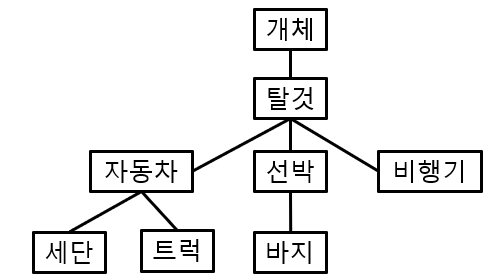

**2.2.1 WordNet**<br/>
자연어 처리 분야에서 가장 잘 알려진 시소러스

* 프린스턴 대학교에서 1985년에 구축
* 다수의 연구와 다양한 자연어 처리 애플리케이션에서 활용


**2.2.2 시소러스의 문제점**<br/>


* 시대에 따른 언어의 변화/등장에 대응이 어려움
* 시소러스를 만드는 것 자체, 상기한 변화에 대한 대응은 인력으로 해결해야 함
* 단어의 미묘한 차이의 표현 불가


# **2.3 통계 기반 기법** <br/>

---

**말뭉치:** 특정한 목적을 띈 자연어 연구나 애플리케이션 개발을 염두에 두고 수집된 텍스트 데이터 집합 <br/>
* 사람이 작성한 문장을 이용함
* 문장의 구성, 유의어의 미묘한 차이를 바르게 이용 등 언어 이용의 경험이 그대로 담겨있는 고급원천
* 자동 추출 및 데이터 집합화

**2.3.1 파이썬으로 말뭉치 전처리하기**

**잘 알려진 유명한 말뭉치:**
* 위키백과
* 구글 뉴스
* 셰익스피어의 작품<br/>
<br/>

**말뭉치 전처리:**
* 텍스트 데이터를 단어(컴퓨터에게 언어를 이해시키기 위한 *적절한* 최소단위)로 분할
* 분할된 단어들을 단어 ID 목록으로 변환


In [5]:
 #2절에서 이용할 말뭉치. 실제로는 어마어마한 길이의 말뭉치를 이용함
text = 'You say goodbye and I say hello.'
print(f'원문:\n {text}\n')

#변수 text를 단어* 단위로 분할
text = text.lower()#소문자로 변환. 대문자가 포함된 단어와 소문자로만 이루어진 단어를 같은 것으로 인식하지 않기 때문
text = text.replace('.', ' .') #마침표는 문장의 마지막에 오기때문에 구분을 위한 토큰으로 두는 등, 중요한 역할을 하기 때문에 살려둘 것 *리플레이스 함수보다는 정규표현식을 이용한 세련된 방법을 권함*

print(f'소문자 변환 및 온점 분리:\n {text}\n')

words = text.split(' ') #띄어쓰기별 구분으로 문장을 단어 단위로 해체
print(f'단어 단위로 해체한 결과:\n {words}')

원문:
 You say goodbye and I say hello.

소문자 변환 및 온점 분리:
 you say goodbye and i say hello .

단어 단위로 해체한 결과:
 ['you', 'say', 'goodbye', 'and', 'i', 'say', 'hello', '.']


In [10]:
#원래의 문장을 단어 목록 형태로 정리
#단어를 텍스트 그대로 조작하고 처리하기 불편하므로 단어별 ID 부여

word_to_id = {}
id_to_word = {}

for word in words:
  if word not in word_to_id:
    new_id = len(word_to_id) #0 ~
    word_to_id[word] = new_id # you:0, say:1 ...
    id_to_word[new_id] = word # 0:you, 1:say ...

#ID와 단어의 대응표 구성
print(word_to_id)
print(id_to_word)


{'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6}
{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}


In [13]:
print(id_to_word[1])
print(word_to_id['hello'])

say
5


In [14]:
#단어 목록(words)을 단어 ID목록으로 변경
import numpy as np

corpus = [word_to_id[w] for w in words] #코퍼스 리스트에 각각의 단어를 대응표에 입력하여 단어별 ID로 기록하는 것 *파이썬 내포(comprehension)
corpus = np.array(corpus)

print(corpus)

[0 1 2 3 4 1 5 6]


In [15]:
def preprocess(text):
  '''
  preprocess: 입력된 문장을 단어 단위로 word2id, id2word 대응표로 구성하는 함수
  text: 문장(type: str)
  '''
  text = text.lower()
  text = text.replace('.', ' .')
  words = text.split(' ')
  word_to_id = {}
  id_to_word = {}

  for word in words:
    if word not in word_to_id:
      new_id = len(word_to_id)
      word_to_id[word] = new_id
      id_to_word[new_id] = word
  
  corpus = np.array([word_to_id[w] for w in words])
  '''
  corpus = list()
  for w in words:
    corpus.append(word_to_id[w])
  '''
  return corpus, word_to_id, id_to_word

In [19]:
corpus, word_to_id, id_to_word = preprocess(text)

print(f'코퍼스: {corpus}')
print(f'단어:ID 대응표: {word_to_id}')
print(f'ID:단어 대응표: {id_to_word}')

코퍼스: [0 1 2 3 4 1 5 6 7]
단어:ID 대응표: {'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '': 6, '.': 7}
ID:단어 대응표: {0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '', 7: '.'}


**2.3.2 단어의 분산표현**

**분산 표현방식의 예시: 색의 명칭**<br/>
색에 이름을 달아줄 경우, 색의 숫자만큼 이름을 달아주어야 한다. 비전문가는 *마젠타*가 어떤 색상일지 알기 힘들다.
* 색상 <R, G, B>
* 마젠타  <170, 33, 22>
* 블랙 <0, 0, 0>
* 레드 <255, 0, 0>
* 화이트<255, 255, 255> <br/>

RGB와 같은 벡터 표현을 이용한다면 색상의 빛깔의 확인, 조색, 구분 등의 과정을 R, G, B 세가지 성분의 수치를 보는 것으로 구분할 수 있다.

**단어를 벡터로 표현하는 것은 정확한 의미(ID)를 표현하는 것**

**2.3.3 분포 가설**

: 단어의 의미는 주변 단어에 의해 형성됨

* 단어 자체보다는 **맥락**에서 의미를 파악
* drink Vs guzzle
* **drink**의 주변에는 **음용 가능한 액체**가 있는 것이 논리적
* **음용 가능한 액체 주변**에 **guzzle**이 있다면 **guzzle**은 **음용하는 행위를 의미**하는 것이 논리적
* 학습에 투입될 경우 drink와 guzzle은 문맥상 비슷한 것을 의미하게 되는것이 학습됨 : 벡터가 가까운 것

**맥락:**
* 주목하는 단어 주변에 놓인 단어
* **윈도우** 단위로 주변 단어와 연관을 파악
 * 윈도우 = 1일 경우 바로 옆 단어와 연관
 * 윈도우 = 2일 경우 그 옆 단어와도 연관



**2.3.4 동시발생 행렬**

**통계 기반 기법:** *(교재의 표현)
* 어떤 단어에 주목했을 때, 그 주변에 어떤 단어가 몇 번 등장하는지 세어 집계하는 방법

In [21]:
import sys
# import numpy as np
# import preprocess

sys.path.append('..')
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

print(corpus)
print(id_to_word)
print(f'단어 수: {len(set(corpus))}')



[0 1 2 3 4 1 5 6]
{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}
단어 수: 7


"you say goodbye and i say hello."

윈도우 = 1 일 경우,

you의 맥락은 say 하나 뿐

표 2-1 단어 "you"의 맥락에 포함되는 단어의 빈도
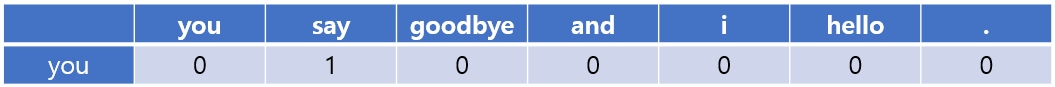



you의 맥락으로 동시에 등장하는 단어의 빈도를 파악.
이를 바탕으로 you라는 단어를 [0, 1, 0, 0, 0, 0, 0]이라는 벡터로 표현 가능

표 2-2 모든 단어 각각의 맥락에 해당하는 단어의 빈도 **동시발생 행렬**
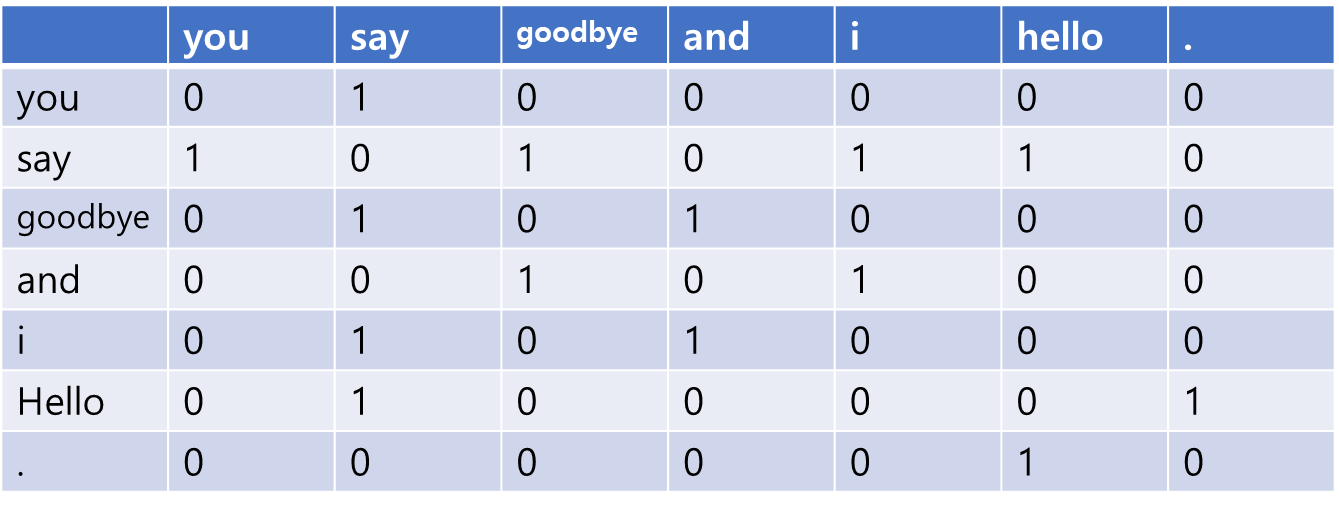


In [23]:
#동시발생 행렬 파이썬으로 구현

C = np.array([
              [0, 1, 0, 0, 0, 0, 0],
              [1, 0, 1, 0, 1, 1, 0],
              [0, 1, 0, 1, 0, 0, 0],
              [0, 0, 1, 0, 1, 0, 0],
              [0, 1, 0, 1, 0, 0, 0],
              [0, 1, 0, 0, 0, 0, 1],
              [0, 0, 0, 0, 0, 1, 0],

], dtype=np.int32)

print(f'ID=0 : {C[0]}') #ID가 0인 단어의 벡터
print(f'ID=4 : {C[4]}') #ID가 4인 단어의 벡터
print(f"goodbye: {C[word_to_id['goodbye']]}")#"goodbye"의 벡터 표현

ID=0 : [0 1 0 0 0 0 0]
ID=0 : [0 1 0 1 0 0 0]
goodbye: [0 1 0 1 0 0 0]


In [25]:
#동시발생 행렬 자동 구성

def create_co_matrix(corpus, vocab_size, window_size=1):
  '''
  create_co_matrix: 입력된 값을 이용하여 동시발생 행렬을 자동으로 구성하는 함수
  corpus: 말뭉치의 단어를 ID로 변경한 것(type: list)
  vocab_size: 말뭉치에 등장하는 단어의 수(type: int)
  window_size: 맥락 윈도우사이즈(type:int, default=1)
  '''
  corpus_size = len(corpus)
  co_matrix = np.zeros((vocab_size, vocab_size), dtype=np.int32) #단어의 길이로 초기화
  
  for idx, word_id in enumerate(corpus):
    for i in range(1, window_size +1): #윈도우 크기만큼 주변 맥락 파악
      left_idx = idx - i
      right_idx = idx + i

      if left_idx >= 0: #윈도우가 문장 바깥으로 안나가도록 막음
        left_word_id = corpus[left_idx]
        co_matrix[word_id, left_word_id] += 1
      
      if right_idx < corpus_size:
        right_word_id = corpus[right_idx]
        co_matrix[word_id, right_word_id] += 1

  return co_matrix

**2.3.5 벡터 간 유사도**

**코사인 유사도:**
단어 벡터의 유사도를 따질 때 이용

벡터 **A** = (a1, a2, a3, ...)와 벡터 **B** = (b1, b2, b3, ...)를 정의했을 때,

식 2.1 <br/>
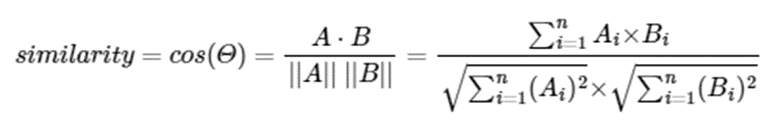



**해설:**
* 분자: 벡터의 내적
* 분모: 각 벡터의 노름의 곱
 * 노름: 벡터의 크기를 의미
 * L2노름: 각 벡터의 원소를 제곱해 더한 값의 제곱근

In [26]:
#코사인 유사도 구현

def cos_similarity(x, y):
  '''
  cos_similarity: 코사인 유사도를 구하는 함수
  x: x넘파이 배열(type: array)
  y: y넘파이 배열(type: array)
  '''
  nx = x / np.sqrt(np.sum(x**2)) #sqrt: 제곱근 연산
  ny = y / np.sqrt(np.sum(y**2))

  return np.dot(nx, ny) #dot: 행렬곱 연산

In [27]:
#위의 코사인 유사도 함수에는 모든 원소가 0인 벡터가 입력될 시 0으로 나누는 오류가 발생함
#이것을 해결하기 위해, 전통적으로 분모의 자리에 충분히 작은 값을 더해줌.
#충분히 작은 값은 부동소수점 계산 시 반올림되어 다른 값에 흡수됨. 이로 인하여 충분히 작은 값이 결과에 영향을 주지 않음.

In [28]:
def cos_similarity(x, y, eps=1e-8):
  '''
  cos_similarity: 코사인 유사도를 구하는 함수
  x: x넘파이 배열(type: array)
  y: y넘파이 배열(type: array)
  eps: 충분히 작은 값(type: float, default = 0.00000001)
  '''
  nx = x / (np.sqrt(np.sum(x**2)) + eps) #sqrt: 제곱근 연산
  ny = y / (np.sqrt(np.sum(y**2)) + eps)

  return np.dot(nx, ny) #dot: 행렬곱 연산

In [29]:
#you와 i의 유사도를 구하기
#코사인 유사도 값은 -1과 1사이에 분포하며, 1에 가까울수록 유사성이 큼

import sys
sys.path.append('..')
# from common.util import preprocess, create_co_matrix, cos_similarity

text = 'You say goodbve and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)

c0 = C[word_to_id['you']] #you의 단어벡터
c1 = C[word_to_id['i']] #i의 단어벡터
print(cos_similarity(c0, c1))

0.7071067691154799


**2.3.6 유사 단어의 랭킹 표시**


In [41]:
def most_similar(query, word_to_id, id_to_word, word_matrix, top=5):
  '''
  most_similar: 검색어로 주어진 단어와 비슷한 단어를 유사도 순으로 출력하는 함수
  query: 검색어(type: str)
  word_to_id: 단어에서 단어 ID로의 딕셔너리(type: dict)
  id_to_word: 단어 ID에서 단어로의 딕셔너리(type: dict)
  word_matrix: 단어 벡터들을 모은 행렬(type: array)
  top: 유사도 상위 몇개까지 출력할지 결정(type: int, default=5)
  '''
  #검색어 꺼내기
  if query not in word_to_id:
    print(f'{query}를 찾을 수 없습니다.')
    return
  
  print('\n[query] ' + query)
  query_id = word_to_id[query]
  query_vec = word_matrix[query_id]

  #코사인 유사도 계산
  vocab_size = len(id_to_word)
  similarity = np.zeros(vocab_size)  
  for i in range(vocab_size):
    similarity[i] = cos_similarity(word_matrix[i], query_vec)
  
  
  #코사인 유사도를 기준으로 내림차순 출력
  count = 0
  for i in (-1 * similarity).argsort(): #argsort() 배열에 담긴 원소의 인덱스를 내림차순으로 정렬
    if id_to_word[i] == query:
      continue
    print(f'{id_to_word[i]}: {similarity[i]}')

    count += 1
    if count >= top:
      return

In [44]:
import sys
sys.path.append('..')
# from common.util import preprocess, create_co_matrix, cos_similarity

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)

most_similar('and', word_to_id, id_to_word, C, top=5)


[query] and
say: 0.7071067726510136
you: 0.0
goodbye: 0.0
i: 0.0
hello: 0.0


말뭉치의 크기가 **너무 작기 때문에** 코사인 유사도상 직관성이 떨어짐!

# **2.4 통계 기반 기법 개선하기**

---


**2.4.1 상호정보량**

**동시발생 행렬의 문제점:**
* 고빈도 단어는 관련이 없는 단어와도 높은 코사인 유사도를 보일 것
* 영어의 정관사 the는 명사와 관련성이 높을 것

<br/>

**점별 상호정보량**척도를 사용하여 이를 방지

식 2-2 점별 상호정보량<br/>
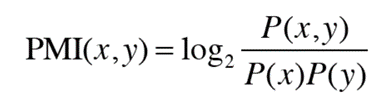

**해설:**
* P(x): x가 일어날 확률 
* P(y): y가 일어날 확률 
* P(x, y): x와 y가 동시에 일어날 확률 
* 값이 높을수록 관련성이 높음

**동시발생 행렬을 이용한 PMI 설명**

식 2-3

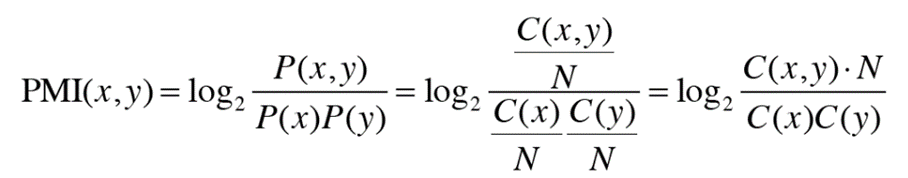

**해설:**
* C: 동시발생 행렬
* C(x, y): 단어 x와 y가 동시발생하는 횟수
* C(x): 단어 x가 등장하는 횟수
* C(y): 단어 y가 등장하는 횟수
* N: 말뭉치에 포함된 단어 수


**예시를 이용한 구체적 계산**

식 2-4, 2-5<br/>
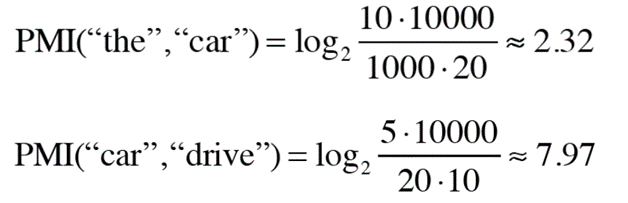

**해설:**
* the, car, drive의 등장횟수 : 10,000, 20, 10
* C(the, car): the와 car가 동시에 발생한 횟수 = 10
* C(car, drive): car와 drive가 동시에 발생한 횟수 = 5

* **the와 car의 동시발생 횟수가 더 많음에도 car와 drive의 관련도가 높다는 결과가 나옴**
* **단어가 단독으로 출현하는 횟수가 고려되었기 때문**
* PMI척도는 두 단어의 동시발생 횟수가 0이라면, 전혀 관계가 없으므로 관련도는 음의 무한대로 발산함
* 이를 피하기 위해 실제 구현시 양의 상호정보량**(PPMI)**를 사용
 * PMI가 음수일 경우 0으로 취급


In [45]:
#PPMI 구현

def ppmi(C, verbose=False, eps=1e-8):
  '''
  ppmi: 양의 상호정보량
  C: 동시발생 행렬(type: array)
  verbose: 진행상황 출력여부 결정 플래그(type: bool, default=False)
  eps: 충분히 작은 수(type: float, default=1e-8)
  '''
  M = np.zeros_like(C, dtype=np.float32)
  N = np.sum(C)
  S = np.sum(C, axis=0)
  total = C.shape[0] * C.shape[1]
  cnt = 0

  for i in range(C.shape[0]):
    for j in range(C.shape[1]):
      pmi = np.log2(C[i, j] * N / (S[j]*S[i]) + eps)
      M[i, j] = max(0, pmi)

      if verbose: #진행상황
        cnt += 1
        if cnt % (total//100) == 0:
          print(f'{100*cnt/total} 완료')
  return M

In [46]:
import sys
sys.path.append('..')
# from common.util import preprocess, create_co_matrix, cos_similarity

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)
W = ppmi(C)

np.set_printoptions(precision=3) #벡터를 소수점 이하 세자리까지 표시
print('동시발생 확률')
print(C)
print('-'*50)
print('PPMI')
print(W)

동시발생 확률
[[0 1 0 0 0 0 0]
 [1 0 1 0 1 1 0]
 [0 1 0 1 0 0 0]
 [0 0 1 0 1 0 0]
 [0 1 0 1 0 0 0]
 [0 1 0 0 0 0 1]
 [0 0 0 0 0 1 0]]
--------------------------------------------------
PPMI
[[0.    1.807 0.    0.    0.    0.    0.   ]
 [1.807 0.    0.807 0.    0.807 0.807 0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.    1.807 0.    1.807 0.    0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.807 0.    0.    0.    0.    2.807]
 [0.    0.    0.    0.    0.    2.807 0.   ]]


**PPMI행렬의 문제점**
* 단어와 단어의 주변 맥락을 파악하는 관계로, 단어의 숫자만큼 차원이 길어짐
* 단어의 개수가 클수록 벡터의 차원은 **과도**해짐
* 0에 해당하는 원소의 숫자가 많음
 * 의미없는 정보가 **과다**
* 벡터의 차원 감소 기법으로 대처

**2.4.2 차원 감소**

* 벡터의 차원을 줄이는 방법
* 데이터 분포를 고려하여 **중요한 정보**는 최대한 유지하면서 줄임

그림 2-2 2차원 데이터를 1차원으로 표현<br/>
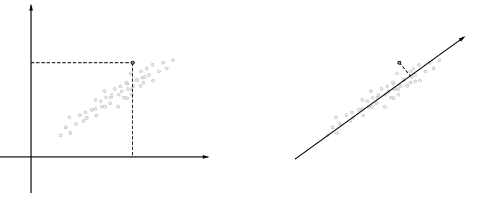

* 벡터의 차원이 적어질수록 데이터는 조밀해짐
* 데이터의 특징을 적합하게 나타내는 축을 찾는 것이 관건


**특잇값분해(SVD)**
* 임의의 행렬을 세 행렬의 곱으로 분해

그림 2-3 SVD에 의한 행렬 X의 분해<br/>
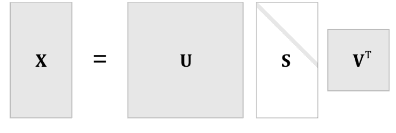

**해설**
* U와 V는 직교행렬
* 직교행렬은 어떠한 공간의 축을 형성함(비어있는 공간의 구성)
* S는 대각행렬


그림 2-4 SVD에 의한 차원 감소

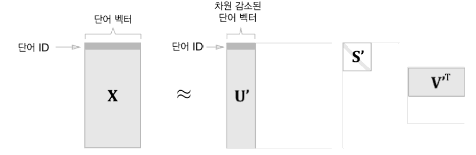

**해설**
* 행렬 S는 대각행렬이기 때문에 의미없는 부분이 대부분
 * 특잇값이 큰 순서로 나열되어 있으며, 의미없는 부분이 대부분이기 때문에 행렬의 크기를 줄여도 정보의 손실이 적으며, 일정한 순서의 나열로 특징의 복원(유지)이 가능함
* 행렬 U와 S의 연산을 위해 U를 절삭하더라도 원래 값의 근사가 가능함
* 행렬 U`*S`와 행렬 V의 연산이 가능하도록 V를 절삭하더라도 원래 값의 근사가 가능함
* S의 특잇값으로 인해 정보의 복원(유지)이 가능하며, U와 V는 공간의 축을 형성하는 정보만을 가지고 있기 때문(?)

In [48]:
#SVD에 의한 차원감소 구현

import sys
sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
# from common.util import preprocess, create_co_matrix, cos_similarity

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)
W = ppmi(C)

#SVD
U, S, V = np.linalg.svd(W)

np.set_printoptions(precision=3) #벡터를 소수점 이하 세자리까지 표시
print('동시발생 확률')
print(C[0])
print('-'*50)
print('PPMI')
print(W[0])
print('-'*50)
print('SVD')
print(U[0])

동시발생 확률
[0 1 0 0 0 0 0]
--------------------------------------------------
PPMI
[0.    1.807 0.    0.    0.    0.    0.   ]
--------------------------------------------------
SVD
[ 3.409e-01 -1.110e-16 -1.205e-01 -4.163e-16 -9.323e-01 -1.110e-16
 -2.426e-17]


In [49]:
#SVD를 거쳐 데이터의 일정한 분포의 특징(데이터 분포를 보여줄 수 있는 중요한 축)을 담고 있는 결과가 나왔기 때문에, 단순히 차원을 절삭하여 조절이 가능함
#U[0]을 2차원 벡터로 줄임
print(U[0, :2])

[ 3.409e-01 -1.110e-16]


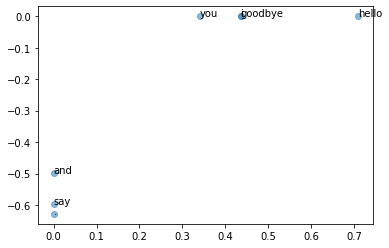

In [51]:
for word, word_id in word_to_id.items():
  plt.annotate(word, (U[word_id, 0], U[word_id, 1]))
  
plt.scatter(U[:, 0], U[:, 1], alpha = 0.5)
plt.show()

**2.4.4 PTB 데이터셋**

* 주어진 기법의 품질을 측정하는 벤치마크로 주로 이용


In [58]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [64]:
%cd drive/My\ Drive/Colab\ Notebooks/dataset

/content/drive/My Drive/Colab Notebooks/dataset


In [66]:
import sys
sys.path.append('..')
import ptb



corpus, word_to_id, id_to_word = ptb.load_data('train')

print('말뭉치 크기:', len(corpus))
print('corpus[:30]:', corpus[:30])
print()
print('id_to_word[0]:', id_to_word[0])
print('id_to_word[1]:', id_to_word[1])
print('id_to_word[2]:', id_to_word[2])
print()
print("word_to_id['car']:", word_to_id['car'])
print("word_to_id['happy']:", word_to_id['happy'])
print("word_to_id['lexus']:", word_to_id['lexus'])



말뭉치 크기: 929589
corpus[:30]: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

id_to_word[0]: aer
id_to_word[1]: banknote
id_to_word[2]: berlitz

word_to_id['car']: 3856
word_to_id['happy']: 4428
word_to_id['lexus']: 7426


In [70]:
import sys
sys.path.append('..')
import numpy as np
# from common.util import most_similar, create_co_matrix, ppmi
import ptb


window_size = 2
wordvec_size = 100

corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
print('동시발생 수 계산 ...')
C = create_co_matrix(corpus, vocab_size, window_size)
print('PPMI 계산 ...')
W = ppmi(C, verbose=True)

print('calculating SVD ...')
try:
    # truncated SVD (빠르다!)
    from sklearn.utils.extmath import randomized_svd
    U, S, V = randomized_svd(W, n_components=wordvec_size, n_iter=5,
                             random_state=None)
except ImportError:
    # SVD (느리다)
    U, S, V = np.linalg.svd(W)

word_vecs = U[:, :wordvec_size]

querys = ['you', 'year', 'car', 'hyundai']
for query in querys:
    most_similar(query, word_to_id, id_to_word, word_vecs, top=5)

동시발생 수 계산 ...
PPMI 계산 ...
1.0 완료
2.0 완료
3.0 완료
4.0 완료
5.0 완료
6.0 완료
7.0 완료
8.0 완료
9.0 완료
10.0 완료
11.0 완료
12.0 완료
13.0 완료
14.0 완료
15.0 완료
16.0 완료
17.0 완료
18.0 완료
19.0 완료
20.0 완료
21.0 완료
22.0 완료
23.0 완료
24.0 완료
25.0 완료
26.0 완료
27.0 완료
28.0 완료
29.0 완료
30.0 완료
31.0 완료
32.0 완료
33.0 완료
34.0 완료
35.0 완료
36.0 완료
37.0 완료
38.0 완료
39.0 완료
40.0 완료
41.0 완료
42.0 완료
43.0 완료
44.0 완료
45.0 완료
46.0 완료
47.0 완료
48.0 완료
49.0 완료
50.0 완료
51.0 완료
52.0 완료
53.0 완료
54.0 완료
55.0 완료
56.0 완료
57.0 완료
58.0 완료
59.0 완료
60.0 완료
61.0 완료
62.0 완료
63.0 완료
64.0 완료
65.0 완료
66.0 완료
67.0 완료
68.0 완료
69.0 완료
70.0 완료
71.0 완료
72.0 완료
73.0 완료
74.0 완료
75.0 완료
76.0 완료
77.0 완료
78.0 완료
79.0 완료
80.0 완료
81.0 완료
82.0 완료
83.0 완료
84.0 완료
85.0 완료
86.0 완료
87.0 완료
88.0 완료
89.0 완료
90.0 완료
91.0 완료
92.0 완료
93.0 완료
94.0 완료
95.0 완료
96.0 완료
97.0 완료
98.0 완료
99.0 완료
100.0 완료
calculating SVD ...

[query] you
i: 0.675233006477356
we: 0.6398127675056458
do: 0.5450775623321533
someone: 0.5225390195846558
anybody: 0.5169590711593628

[query] year
month: 0.675

# **2.5 정리**

---

* 자연어를 대상으로 "단어의 의미" 이해 시키기
* 시소러스
 * 사람이 구성, 표현력에 한계
* 통계 기반 기법
 * 단어의 의미 자동 추출, 벡터로 표현
 * 단어의 동시발생 행렬, PPMI행렬 변환, SVD를 이용한 차원 감소, 분산표현
 